In [1]:
import math
import random
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("data/total_watt.csv", header= None)
df.columns = ['Date_Time', 'Power_consumption']
str_date = df['Date_Time']
df['Date_Time']= pd.DatetimeIndex(df['Date_Time'])
temp = pd.DatetimeIndex(df['Date_Time'])
df['Date'] = temp.date
df['Time'] = temp.time

In [3]:
# Grouping by Date and computing the power consumption mean value
aa = df.groupby('Date').Power_consumption.mean()
bb = pd.unique(aa.index)
# # Grouping by Time and computing the mean power consumption for every half-hour
cc = df.groupby('Time').Power_consumption.mean()
dd = pd.unique(cc.index)
# I could have used df.resample('D', how = 'mean') to get the daily average

# Daily power consumption of electricity divided in quantiles

In [4]:
# Splitting the daily data into 3 quantiles (low, medium and high power comsumption)
low = aa.where((aa < aa.quantile(q=0.333333)))
medium = aa.where((aa > aa.quantile(0.333333)) & (aa < aa.quantile(0.66666667)))
high = aa.where(aa > aa.quantile(0.66666667))

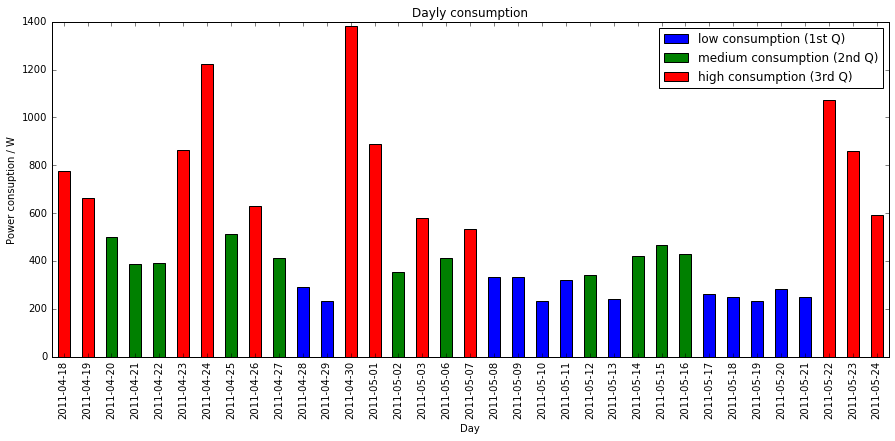

In [5]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (15,6)) 
low.plot(ax = ax, kind='bar', label = 'low consumption (1st Q)')
medium.plot(ax = ax, kind='bar', color = 'green', label = 'medium consumption (2nd Q)')
high.plot(ax = ax, kind='bar', color = 'red', label = 'high consumption (3rd Q)')
ax.set_title('Dayly consumption')
ax.set_xlabel('Day')
ax.set_ylabel('Power consuption / W')
plt.legend(loc='upper right')

# Half hourly power consumption of electricity divided in quantiles

In [6]:
# Spliting the hourly data in 3 quantiles
low_day = cc.where((cc < cc.quantile(q=0.333333)))
medium_day = cc.where((cc > cc.quantile(0.333333)) & (cc < cc.quantile(0.66666667)))
high_day = cc.where(cc > cc.quantile(0.66666667))

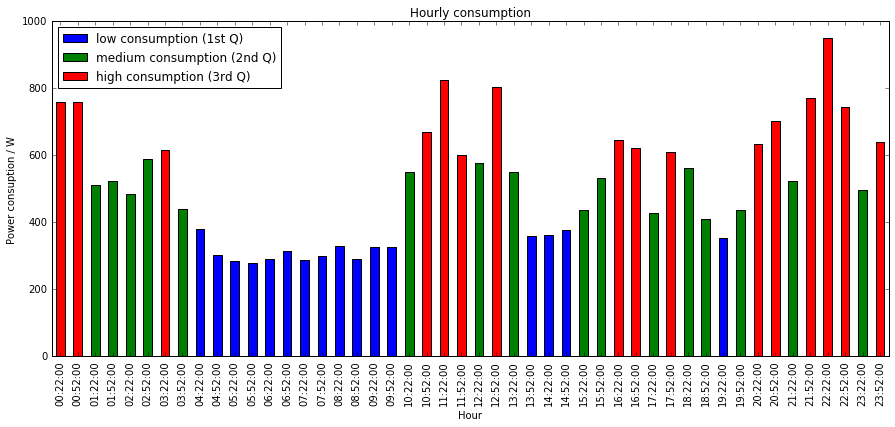

In [7]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (15,6)) 
low_day.plot(ax = ax, kind='bar', label = 'low consumption (1st Q)')
medium_day.plot(ax = ax, kind='bar', color = 'green', label = 'medium consumption (2nd Q)')
high_day.plot(ax = ax, kind='bar', color = 'red', label = 'high consumption (3rd Q)')
ax.set_title('Hourly consumption')
ax.set_xlabel('Hour')
ax.set_ylabel('Power consuption / W')
plt.legend(loc='upper left')

The plot shows that the longest period of lower power consuption is between 4 to 10 am. The afternoon shows also periods of underusage. 

# Finding clusters using K-means

## K-means for average daily power consumption

In [8]:
date_total = mdates.date2num(bb.tolist())
#creating a Dafaframe with power and date in numerical
www = pd.DataFrame({'Power':aa.values}, index = date_total)
#creating a Dafaframe with power and date
kmeans_df = pd.DataFrame({'Power':aa.values}, index = bb)
#transforming it to a matrix
df_cluster = www.as_matrix()

kmeans = KMeans(n_clusters=3, n_init=500)
#Position of centroids
kmeans.fit(df_cluster)
cluster_centre= kmeans.cluster_centers_
#labels of each cluster. ATENTION: IN A NORMAL CASE I SHOULD DEVIDE THE TEST AND TRAIN SMAPLES
label = kmeans.labels_
kmeans_df['Label'] = label

In [9]:
c1_day = kmeans_df[['Power']].where( kmeans_df['Label'] == 0).fillna(0)
c2_day = kmeans_df[['Power']].where( kmeans_df['Label'] == 1).fillna(0)
c3_day = kmeans_df[['Power']].where( kmeans_df['Label'] == 2).fillna(0)

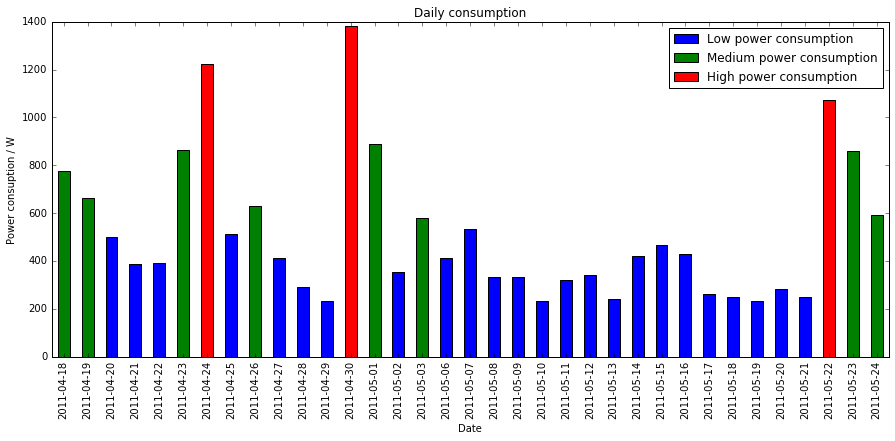

In [10]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize = (15,6)) 
c1_day.plot(ax = ax, kind='bar',label = 'low consumption')
c2_day.plot(ax = ax, kind='bar', color = 'green', label = 'medium consumption')
c3_day.plot(ax = ax, kind='bar', color = 'red', label = 'high consumption')
ax.set_title('Daily consumption')
ax.set_xlabel('Date')
ax.set_ylabel('Power consuption / W')
plt.legend(["Low power consumption","Medium power consumption","High power consumption"],  loc='upper right')


Using quantiles instead of clustering the three groups of power usage give us very diferent results. The clustering tends to reduce the number of days regarded as high consuption days and increases the number of days labeled as low power consumption days. This occurs because the quantile calculations do not take into account how far apart the values are. The k-means clustering determines the best centroid positions for a given number of predetermined clusters, therefore the distance between points is paramount for the calculation.